<a href="https://colab.research.google.com/github/Drozeler/Machine-Learning/blob/main/PredictingTikTokViewsSocialBread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Tiktokviews.csv')
df.head()

,Views,Likes,Comments,Saves,Shares,Completed %,Average %,New Followers,Video Length
0,2673,49,0,4,7,4.97,45.233125,2,14
1,1379,24,0,3,3,3.53,28.993147,0,18
2,3393,36,5,5,3,2.46,13.161465,6,73
3,1920,47,1,3,3,6.00,34.122179,2,18
4,2147,32,3,7,8,4.93,34.640523,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Views          76 non-null     int64  
 1   Likes          76 non-null     int64  
 2   Comments       76 non-null     int64  
 3   Saves          76 non-null     int64  
 4   Shares         76 non-null     int64  
 5   Completed %    76 non-null     float64
 6   Average %      76 non-null     float64
 7   New Followers  76 non-null     int64  
 8   Video Length   76 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 5.5 KB


<Axes: >

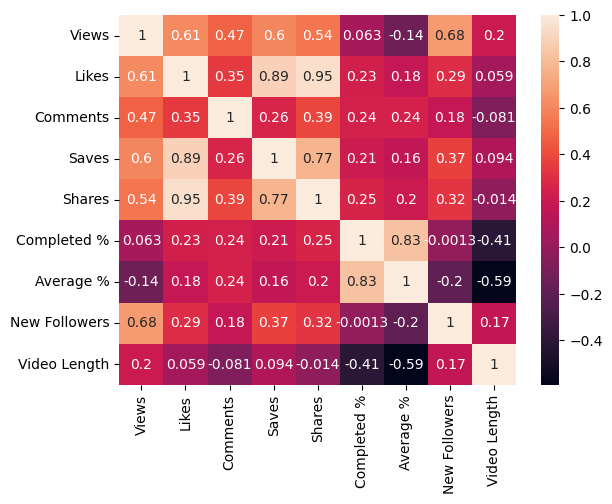

In [ ]:
sns.heatmap(df.corr(),annot=True)

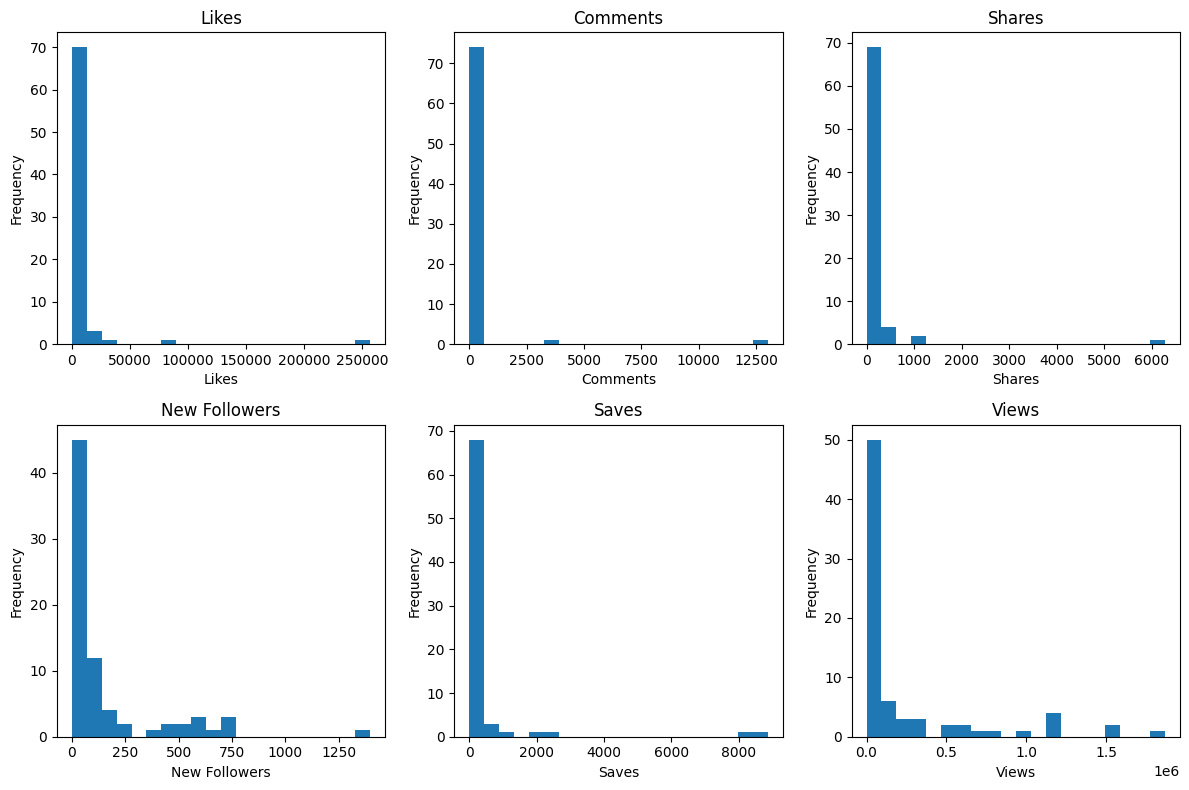

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Likes', 'Comments', 'Shares', 'New Followers', 'Saves', 'Views']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Views,Likes,Comments,Saves,Shares,Completed %,Average %,New Followers,Video Length
count,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.312061e+05,6548.947368,242.513158,368.447368,172.368421,11.104737,33.314943,146.473684,31.947368
std,4.214006e+05,31176.080294,1534.471092,1400.538852,735.018654,11.220448,20.425955,257.021165,20.601550
min,9.000000e+01,1.000000,0.000000,0.000000,0.000000,0.310000,3.743316,0.000000,5.000000
25%,2.538750e+03,59.250000,1.000000,6.750000,4.000000,2.715000,18.743626,1.750000,16.750000
50%,2.933400e+04,310.500000,8.000000,24.000000,21.000000,6.680000,31.154373,31.500000,25.000000
75%,2.121918e+05,1429.000000,17.250000,132.000000,89.250000,15.332500,46.775262,125.750000,38.750000
max,1.866327e+06,257000.000000,13000.000000,8857.000000,6278.000000,47.400000,80.196937,1398.000000,99.000000


In [ ]:
df[['Average %', 'New Followers', 'Video Length']].describe()

,Average %,New Followers,Video Length
count,76.000000,76.000000,76.000000
mean,33.314943,146.473684,31.947368
std,20.425955,257.021165,20.601550
min,3.743316,0.000000,5.000000
25%,18.743626,1.750000,16.750000
50%,31.154373,31.500000,25.000000
75%,46.775262,125.750000,38.750000
max,80.196937,1398.000000,99.000000


In [ ]:
df.head()

,Views,Likes,Comments,Saves,Shares,Completed %,Average %,New Followers,Video Length
0,2673,49,0,4,7,4.97,45.233125,2,14
1,1379,24,0,3,3,3.53,28.993147,0,18
2,3393,36,5,5,3,2.46,13.161465,6,73
3,1920,47,1,3,3,6.00,34.122179,2,18
4,2147,32,3,7,8,4.93,34.640523,4,15


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df[['Likes', 'Comments', 'Shares', 'New Followers', 'Saves']]
y = df['Views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
   scaler = StandardScaler()
   scaler.fit(X)  # Fit scaler on original X without constant

   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   X_scaled = scaler.transform(X)

   model = LinearRegression(fit_intercept=True)  # Let model learn intercept
   model.fit(X_train_scaled, y_train)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
   model.fit(X_train_scaled, y_train_log)
y_pred_log_all = model.predict(X_scaled)
y_pred_all = np.expm1(y_pred_log_all)

# Assign predictions to the DataFrame
df['Predicted Views'] = y_pred_all

In [ ]:
mse_lr = mean_squared_error(y_test, y_test_log)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_test_log)
mae_lr = mean_absolute_error(y_test, y_test_log)
mape = mean_absolute_percentage_error(y_test, y_test_log)

print('Mean Squared Error (MSE):', mse_lr)
print('Root Mean Squared Error (RMSE):', rmse_lr)
print('R-squared (R2):', r2_lr)
print('Mean Absolute Error (MAE):', mae_lr)
print("MAPE:", mape)

Mean Squared Error (MSE): 256080305705.5293
Root Mean Squared Error (RMSE): 506043.77844760555
R-squared (R2): -0.3850505206651773
Mean Absolute Error (MAE): 266819.90964187577
MAPE: 0.9992176047370557


In [ ]:
print(y_pred_all)

[6.47270236e+03 6.38597278e+03 6.71395800e+03 6.50544339e+03
 6.55106532e+03 6.44814662e+03 6.42128974e+03 4.69975472e+03
 5.54723798e+03 6.40814455e+03 6.42134779e+03 6.36900317e+03
 6.43386189e+03 6.39007556e+03 6.66547837e+03 6.31817340e+03
 6.41502729e+03 6.42523807e+03 6.42481488e+03 6.43975905e+03
 6.38562454e+03 6.41565062e+03 6.42628274e+03 6.48719471e+03
 6.52791121e+03 3.41845556e+04 1.03304610e+04 6.37171409e+03
 6.57911983e+03 6.54900863e+03 1.39835854e+06 6.35507635e+03
 6.47462468e+03 1.16709379e+04 6.44680323e+03 6.59720662e+03
 3.16967738e+04 1.06619742e+06 2.26735043e+04 3.26472904e+06
 9.96218817e+03 3.83271034e+04 1.19733952e+04 8.31985734e+03
 1.33471664e+04 1.03873741e+04 1.51876174e+04 2.00487753e+04
 9.55114072e+03 1.31359567e+04 1.28137968e+04 1.20969352e+05
 8.07934583e+03 1.36951550e+04 8.84710135e+03 1.51367891e+06
 9.78400559e+03 8.42761236e+03 3.46667584e+03 4.29741628e+04
 9.80675431e+03 7.55859366e+03 7.12192049e+03 6.94690717e+03
 7.27557320e+03 3.922340

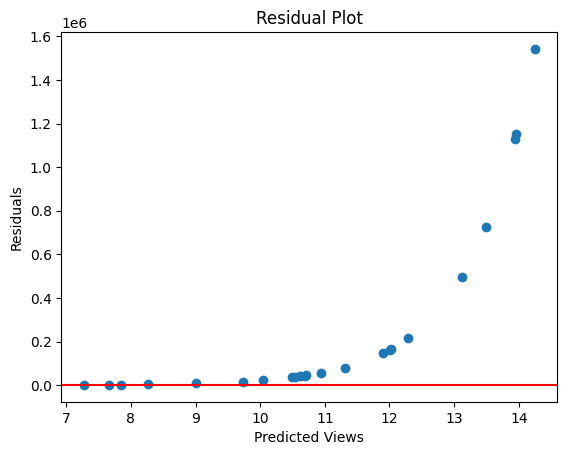

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_test_log
plt.scatter(y_test_log, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Views')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

         Feature   VIF
0          Likes 32.00
1       Comments  1.35
2         Shares 58.15
3  New Followers  1.84
4          Saves 27.03


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr = LinearRegression()

# Assuming X and y are already defined as your features and target variable
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [-5.51903599e+09 -2.70861652e+14 -1.30783239e+12 -2.73123552e+10
 -1.98875793e+11]


In [ ]:
df['Rank'] = df['Predicted Views'].rank(ascending=False)

In [ ]:
df_sorted = df.sort_values(by='Rank')

In [ ]:
df_sorted.head()

,Views,Likes,Comments,Saves,Shares,Completed %,Average %,New Followers,Video Length,Predicted Views,Rank
71,1127431,9395,165,148,212,0.82,8.32,1398,55,1111818249.13,1.00
70,1183240,3411,7,35,94,0.40,4.83,741,60,3653349.36,2.00
39,1866327,257000,3419,8857,6278,29.32,57.64,587,31,3264729.04,3.00
55,310810,2797,104,572,447,6.46,19.61,750,33,1513678.91,4.00
30,1497867,33000,13000,1077,1077,29.20,70.12,385,16,1398358.54,5.00


In [ ]:
def categorize_views(view):
    if view <= 10000:
        return 'Short Time'
    elif view <= 100000:
        return 'Medium Time'
    else:
        return 'Long Time'

df_sorted['Time Group'] = df_sorted['Predicted Views'].apply(categorize_views)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df[['Predicted Views', 'Views']])

    Predicted Views    Views
0           6472.70     2673
1           6385.97     1379
2           6713.96     3393
3           6505.44     1920
4           6551.07     2147
5           6448.15     2430
6           6421.29     1441
7           4699.75    16907
8           5547.24     7382
9           6408.14     1970
10          6421.35     4947
11          6369.00     1149
12          6433.86     1324
13          6390.08     1087
14          6665.48     2384
15          6318.17     1749
16          6415.03     1069
17          6425.24     1632
18          6424.81     1209
19          6439.76     4878
20          6385.62     3013
21          6415.65     2058
22          6426.28     2575
23          6487.19     2013
24          6527.91     8923
25         34184.56   544240
26         10330.46    45014
27          6371.71     2108
28          6579.12     3863
29          6549.01     2961
30       1398358.54  1497867
31          6355.08       90
32          6474.62     2326
33         116

In [ ]:
def time_to_reach(views):
    if views <= 10000:
        return views / 10000 * 3
    elif views <= 100000:
        return 3 + (views - 10000) / 90000 * 7
    elif views <= 1000000:
        return 10 + (views - 100000) / 900000 * 20
    else:
        return 30 + (views - 1000000) / 9000000 * 30  # Scale linearly beyond 1 million

df_sorted['Time to Reach'] = df_sorted['Predicted Views'].apply(time_to_reach)
print(df_sorted[['Time to Reach', 'Views']])

    Time to Reach    Views
71        3732.73  1127431
70          38.84  1183240
39          37.55  1866327
55          31.71   310810
30          31.33  1497867
74          30.70   970409
37          30.22   588541
72          19.26   815111
75          18.86  1150301
65          16.49   114704
51          10.47   295677
66           8.95   237978
59           5.56   725874
41           5.20   165407
25           4.88   544240
73           4.70   609843
36           4.69   210418
68           4.35   498178
38           3.99   143458
47           3.78    85103
46           3.40    44009
53           3.29    55535
44           3.26    39479
49           3.24    56220
50           3.22    37507
69           3.18   217513
42           3.15   334824
33           3.13   148113
45           3.03   131198
26           3.03    45014
40           2.99  1542183
60           2.94   163465
56           2.94    35840
48           2.87    17057
54           2.65    41049
57           2.53    22828
4

In [ ]:

# Assuming 'y' is already defined as your target variable (e.g., 'Views')
X = sm.add_constant(X)  # Add a constant to the model

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     46.77
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.43e-21
Time:                        01:30:56   Log-Likelihood:                -1035.8
No. Observations:                  76   AIC:                             2084.
Df Residuals:                      70   BIC:                             2098.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.16e+04   2.78e+04      2.217